# Semmelweis and puerperal fever 

<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:1em;">

This notebook is an element of the free [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/). 

Author: Eric Marsden <eric.marsden@risk-engineering.org>. 

---

This notebook contains an introduction to use of Python and the NumPy library to analyze statistical data. 

It concerns the work of medical doctor [Ignaz Semmelweis](https://en.wikipedia.org/wiki/Ignaz_Semmelweis) in reducing the risk of puerperal fever during childbirth in Vienna and Budapest during the mid-19th century. Semmelweis collected and analyzed historical data on deaths in his clinic and established a theory of what was contributing to deaths of mothers as well as a risk reduction measure. Semmelweis required doctors to wash their hands using chlorinated solutions before examining patients, which reduced mortality rates in the hospitals where the preventive measure was applied. 

In [1]:
import numpy
import pandas
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats=["svg"]
plt.style.use("bmh")

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Dr Semmelweis, a Hungarian doctor who started working at Vienna General Hospital’s maternity clinic in 1846, was concerned by the high mortality rates due to childbed fever, which in some hospitals was as high as 40% of admitted mothers. He collected and analyzed the data available concerning death rates each month in different hospitals.

In [2]:
# Data comes from https://en.wikipedia.org/wiki/Historical_mortality_rates_of_puerperal_fever
wien = pandas.read_csv("https://risk-engineering.org/static/data/wien-fever-mortality.csv", parse_dates=["year"])
wien.set_index("year", inplace=True)
wien.head()

births  deaths
year                      
1784-01-01     284       6
1785-01-01     899      13
1786-01-01    1151       5
1787-01-01    1407       5
1788-01-01    1425       5

In [3]:
wien["mortality"] = 100 * wien.deaths / wien.births

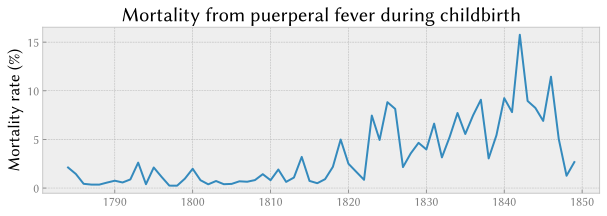

In [4]:
plt.figure(figsize=(10,3))
plt.plot(wien.mortality)
plt.title("Mortality from puerperal fever during childbirth")
plt.ylabel("Mortality rate (%)");

Dr Semmelweis noticed that the mortality rate started increasing around 1823, when the clinic started lessons on pathological anatomy. Doctors would take classes on cadavers in the morgue, then might deliver a baby or examine a patient, possibly with pieces of contaminated flesh remaining on their hands. One of Semmelweis’ colleagues suffered an accidental cut from a scalpel during a dissection and quickly died, with the same types of symptoms as mothers with childbed fever saw. From these observations, Semmelweis developed a suspicion that something present on the corpses, and spread by the hands of the doctors, was causing the childbed fever.

Dr Semmelweis looked for further evidence supporting his hypothesis. There were two maternity clinics at his hospital in Vienna, managed in different ways. He analyzed the death rates in these two clinics. 

In [5]:
# Data comes from https://en.wikipedia.org/wiki/Historical_mortality_rates_of_puerperal_fever
clinics = pandas.read_csv("https://risk-engineering.org/static/data/wien-fever-mortality-per-clinic.csv", parse_dates=["year"])
clinics.set_index("year", inplace=True)
clinics.head()

births1  deaths1  births2  deaths2
year                                          
1833-01-01     3737      197      353        8
1834-01-01     2657      205     1744      150
1835-01-01     2573      143     1682       84
1836-01-01     2677      200     1670      131
1837-01-01     2765      251     1784      124

Column `births1` indicates the number of births in clinic 1 during that year, and `deaths1` the number of deaths. From these, we can calculate the mortality rate in each clinic. 

In [6]:
# mortality in clinic 1 and in clinic 2
clinics["mortality1"] = 100 * clinics.deaths1 / clinics.births1
clinics["mortality2"] = 100 * clinics.deaths2 / clinics.births2

In [7]:
clinics.head()

births1  deaths1  births2  deaths2  mortality1  mortality2
year                                                                  
1833-01-01     3737      197      353        8    5.271608    2.266289
1834-01-01     2657      205     1744      150    7.715469    8.600917
1835-01-01     2573      143     1682       84    5.557715    4.994055
1836-01-01     2677      200     1670      131    7.471050    7.844311
1837-01-01     2765      251     1784      124    9.077758    6.950673

Dr Semmelweis arrived in 1846, and spent a year analyzing the data. He noticed that the death rates in the past years were much higher in one clinic than the other one. Furthermore, the difference between the two clinics started around 1841, when clinic 2 started being run only by midwives. 

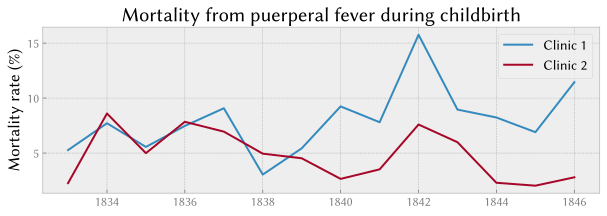

In [8]:
past = clinics.query("year < 1847")
plt.figure(figsize=(10,3))
plt.plot(past.mortality1, label="Clinic 1")
plt.plot(past.mortality2, label="Clinic 2")
plt.legend()
plt.title("Mortality from puerperal fever during childbirth")
plt.ylabel("Mortality rate (%)");

Dr Semmelweis suspected that the higher death rates in clinic 1 were due to it being staffed by medical students who were also studying autopsy by examining corpses.

In 1847, Semmelweis managed to convince doctors always to wash their hands with a chlorinated solution between autopsy work and work with patients. This was an unorthodox suggestion at the time (note that this was before chemist and medical researcher Louis Pasteur developed his germ theory). We can examine the effect that this preventive measure had on mortality rates: 

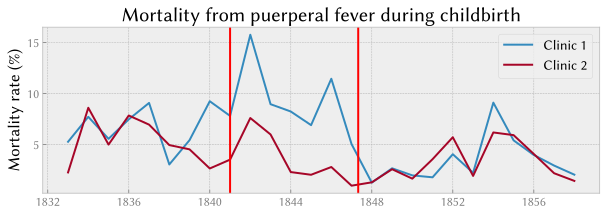

In [9]:
import datetime

plt.figure(figsize=(10,3))
plt.plot(clinics.mortality1, label="Clinic 1")
plt.plot(clinics.mortality2, label="Clinic 2")
plt.axvline(datetime.date(1841, 1, 1), color="red")
plt.axvline(datetime.date(1847, 5, 1), color="red")
plt.title("Mortality from puerperal fever during childbirth")
plt.legend()
plt.ylabel("Mortality rate (%)");

This graph shows that the difference between the two clinics was strongly reduced following the introduction of handwashing. 

There was significant resistance to the implementation of techniques suggested by Semmelweis. Some doctors, for instance, were offended at the suggestion that they should wash their hands, feeling that their social status as gentlemen was inconsistent with the idea that their hands could be unclean (and with the “ridiculous” notion that as doctors, they could be responsible for the transmission of disease 😱). 

There are two important dates to analyze in this time series to validate Semmelweis’ hypothesis on the origin of the infections:

- In 1823, the clinic started lessons on pathological anatomy. Doctors would take classes on cadavers in the morgue, then might deliver a baby or examine a patient, possibly with pieces of contaminated flesh remaining on their hands. 

- In 1847, Semmelweis managed to convince doctors always to wash their hands with a chlorinated solution between autopsy work and work with patients.

We want to compare the death rate attributed to puerperal fever in the three periods delimited by these two dates, to determine whether the rate increased after the introduction of anatomy lessons and decreased after handwashing was implemented, as is suggested by the graph above.

In [10]:
period1 = wien.query("year < 1823")
period1.mortality.mean()

1.1659516507026884

In [11]:
period2 = wien.query("1823 <= year <= 1847")
period2.mortality.mean()

6.817302050585868

In [12]:
period3 = wien.query("1847 < year")
period3.mortality.mean()

1.9676219516106366

In [13]:
wien.loc[:"1832", "period"] = "Period 1"
wien.loc["1833":"1847", "period"] = "Period 2"
wien.loc["1848":, "period"] = "Period 3"

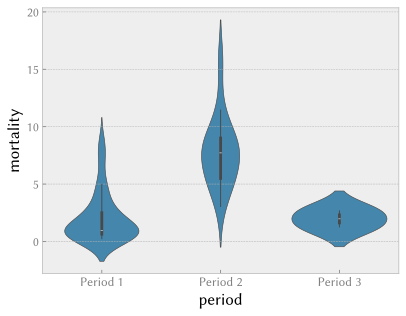

In [14]:
sns.violinplot(data=wien, x="period", y="mortality");

This result is indeed quite convincing, in particular the marked reduction in infection rate moving from period 2 to period 3, when doctors were following the risk reduction measure.

## Epilogue

As the French philosopher Voltaire wrote, “It is dangerous to be right in matters on which the established authorities are wrong”. Despite the statistical evidence of the usefulness of the handwashing precautions he put in place, Semmelweis was unpopular with the medical establishment, and in 1849 was unable to renew his position in the maternity, or in other hospitals in Vienna. He ended up returning to Budapest, with significant frustration. His handwashing theory was criticized in numerous medical journals and public lectures. Semmelweis ended up having a nervous breakdown, being committed to a mental institution and dying from an infection at age 47 after an encounter with a guard. 